# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv("train_new_data.csv")
resource_data = pd.read_csv("resources.csv")

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

preprocessing school state

In [7]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

preprocessing teacher prefix

In [8]:
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
prefix_dict = dict(my_counter)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))

preprocessing project grade category

In [9]:
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
pgc_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    pgc_list.append(temp.strip())
    
project_data['clean_pgc'] = pgc_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_pgc'].values:
    my_counter.update(word.split())

pgc_dict = dict(my_counter)
sorted_pgc_dict = dict(sorted(pgc_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_pgc,essay
0,0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,18-11-2016 14:45,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language,Literacy,GradesPreK-2,Most of my kindergarten students come from low...
1,3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,12-08-2016 15:42,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,Health_Sports,Health_Wellness,Grades3-5,My students are the greatest students but are ...


Decontracting function for sentence

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [14]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=sent.lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:48<00:00, 1010.12it/s]


In [15]:
# after preprocesing
preprocessed_essays[2000]

'bilingual first grade students full joy eager learn classroom place daily growth constant challenge discovery students spend year learning foundations reading writing math order succeed lives quickly becoming independent learners taking information learned apply multiple activities allow use imagination high level thinking skills teacher low income high poverty school district students faced several challenges classroom personal folders used every day reading writing math classes provide students personal space using folders help students focus work not neighbor students able use dividers whole group independent small group time instruction generous donation project improve students self confidence independence donating project not help improve increase student attention focus ultimately help increase academic achievementnannan'

In [16]:
project_data["clean_essays"] = preprocessed_essays

project_data.drop(['essay'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [17]:
preprocessed_pt = []
for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_pt.append(title.lower().strip())

100%|██████████| 109248/109248 [00:04<00:00, 25151.75it/s]


In [18]:
project_data["clean_pt"] = preprocessed_pt
project_data.drop(['project_title'], axis=1, inplace=True)

# number of words in title

In [19]:
title_word_count = []
for i in project_data["clean_pt"] :
    j = len(i.split())
    title_word_count.append(j)
project_data["title_word_count"] = title_word_count
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_pgc,clean_essays,clean_pt,title_word_count
0,0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,18-11-2016 14:45,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language,Literacy,GradesPreK-2,kindergarten students come low income househol...,super sight word centers,4
1,3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,12-08-2016 15:42,My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,Health_Sports,Health_Wellness,Grades3-5,students greatest students socially economical...,kid inspired equipment increase activities gai...,8
2,4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,06-08-2016 09:09,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,Health_Sports,Health_Wellness,Grades6-8,students athletes students interested health p...,we need clean water culinary arts class,7
3,5,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,05-11-2016 10:01,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,AppliedLearning Literacy_Language,CharacterEducation Literature_Writing,GradesPreK-2,kids tell day want make one happy teacher resp...,need reach our virtual mentors,5
4,6,p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,31-08-2016 00:30,Kindergarten is the new first grade. My studen...,With balance discs and stools as flexible seat...,NaN,NaN,My students need stability stools and inflatab...,1,1,Health_Sports,Health_Wellness,GradesPreK-2,kindergarten new first grade students held hig...,active kindergartners,2


# number of words in essay

In [20]:
essay_word_count = []
for i in project_data["clean_essays"] :
    j = len(i.split())
    essay_word_count.append(j)
project_data["essay_word_count"] = essay_word_count
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,clean_pgc,clean_essays,clean_pt,title_word_count,essay_word_count
0,0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,18-11-2016 14:45,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Literacy_Language,Literacy,GradesPreK-2,kindergarten students come low income househol...,super sight word centers,4,156
1,3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,12-08-2016 15:42,My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,Health_Sports,Health_Wellness,Grades3-5,students greatest students socially economical...,kid inspired equipment increase activities gai...,8,207
2,4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,06-08-2016 09:09,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,Health_Sports,Health_Wellness,Grades6-8,students athletes students interested health p...,we need clean water culinary arts class,7,90
3,5,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,05-11-2016 10:01,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,AppliedLearning Literacy_Language,CharacterEducation Literature_Writing,GradesPreK-2,kids tell day want make one happy teacher resp...,need reach our virtual mentors,5,101
4,6,p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,31-08-2016 00:30,Kindergarten is the new first grade. My studen...,With balance discs and stools as flexible seat...,NaN,NaN,My students need stability stools and inflatab...,1,1,Health_Sports,Health_Wellness,GradesPreK-2,kindergarten new first grade students held hig...,active kindergartners,2,154


# Calculate Sentiment Scores for the essays

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [22]:
neg = []
pos = []
neu = []
compound = []
for i in tqdm(project_data["clean_essays"]) :
    j = analyser.polarity_scores(i)['neg']
    k = analyser.polarity_scores(i)['pos']
    l = analyser.polarity_scores(i)['neu']
    m = analyser.polarity_scores(i)['compound']
    neg.append(j)
    pos.append(k)
    neu.append(l)
    compound.append(m)

100%|██████████| 109248/109248 [21:55<00:00, 83.07it/s] 


In [23]:
project_data["neg"] = neg
project_data["pos"] = pos
project_data["neu"] = neu
project_data["compound"] = compound

In [24]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,...,clean_subcategories,clean_pgc,clean_essays,clean_pt,title_word_count,essay_word_count,neg,pos,neu,compound
0,0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,18-11-2016 14:45,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,...,Literacy,GradesPreK-2,kindergarten students come low income househol...,super sight word centers,4,156,0.061,0.175,0.764,0.9553
1,3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,12-08-2016 15:42,My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,...,Health_Wellness,Grades3-5,students greatest students socially economical...,kid inspired equipment increase activities gai...,8,207,0.034,0.269,0.697,0.9948


Splitting data as train ,test and CV

In [25]:
from sklearn.model_selection import train_test_split
S_train, S_test, y_train, y_test = train_test_split(project_data,
project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'
])
S_train, S_cv, y_train, y_cv = train_test_split(S_train, y_train, test_size=0.30, stratify=y_train)

In [26]:
S_train.drop(['project_is_approved'], axis=1, inplace=True)
S_test.drop(['project_is_approved'], axis=1, inplace=True)
S_cv.drop(['project_is_approved'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_pgc', 'clean_essays',
       'clean_pt', 'title_word_count', 'essay_word_count', 'neg', 'pos', 'neu',
       'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

#VECTORIZING CLEAN CATEGORIES USING ONE HOT ENCODING

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_clean_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_cat.fit(S_train['clean_categories'].values)
categories_one_hot_train = vectorizer_clean_cat.transform(S_train['clean_categories'].values)
categories_one_hot_test = vectorizer_clean_cat.transform(S_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_clean_cat.transform(S_cv['clean_categories'].values)
print(vectorizer_clean_cat.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (51237, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (21959, 9)


VECTORIZING CLEAN SUBCATEGORIES USING ONE HOT ENCODING

In [29]:
vectorizer_clean_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=
True)
vectorizer_clean_subcat.fit(S_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer_clean_subcat.transform(S_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_clean_subcat.transform(S_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_clean_subcat.transform(S_cv['clean_subcategories'].values)
print(vectorizer_clean_subcat.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv
.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (51237, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (21959, 30)


VECTORIZING SCHOOL STATE USING ONE HOT ENCODING

In [30]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
vectorizer_school_state= CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=
True)
vectorizer_school_state.fit(S_train['school_state'].values)
school_state_one_hot_train = vectorizer_school_state.transform(S_train['school_state'].values)
school_state_one_hot_test = vectorizer_school_state.transform(S_test['school_state'].values)
school_state_one_hot_cv = vectorizer_school_state.transform(S_cv['school_state'].values)
print(vectorizer_school_state.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",school_state_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_one_hot_cv
.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding  (51237, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding  (21959, 51)


VECTORIZING TEACHER PREFIX USING ONE HOT ENCODING

In [31]:
vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase=False, binary=
True)
vectorizer_prefix.fit(S_train['teacher_prefix'].values)
teacher_prefix_one_hot_train = vectorizer_prefix.transform(S_train['teacher_prefix'].values)
teacher_prefix_one_hot_test = vectorizer_prefix.transform(S_test['teacher_prefix'].values)
teacher_prefix_one_hot_cv = vectorizer_prefix.transform(S_cv['teacher_prefix'].values)
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",teacher_prefix_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",teacher_prefix_one_hot_cv
.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix of Train data after one hot encoding  (51237, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of Cross Validation data after one hot encoding  (21959, 5)


VECTORIZING PROJECT GRADE CATEGORY USING ONE HOT ENCODING

In [32]:
vectorizer_pgc= CountVectorizer(vocabulary=list(sorted_pgc_dict.keys()), lowercase=False, binary=
True)
vectorizer_pgc.fit(S_train['clean_pgc'].values)
clean_project_grade_category_one_hot_train = vectorizer_pgc.transform(S_train['clean_pgc'].values)
clean_project_grade_category_one_hot_test = vectorizer_pgc.transform(S_test['clean_pgc'].values)
clean_project_grade_category_one_hot_cv = vectorizer_pgc.transform(S_cv['clean_pgc'].values)
print(vectorizer_pgc.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",clean_project_grade_category_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",clean_project_grade_category_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",clean_project_grade_category_one_hot_cv
.shape)

['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']
Shape of matrix of Train data after one hot encoding  (51237, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of Cross Validation data after one hot encoding  (21959, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [33]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
text_bow = vectorizer_bow.fit_transform(S_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow.shape)

Shape of matrix after one hot encoding  (51237, 5000)


In [34]:
text_bow_test = vectorizer_bow.transform(S_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


In [35]:
text_bow_cv = vectorizer_bow.transform(S_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (21959, 5000)


In [36]:
vectorizer_title_bow = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
title_bow_train= vectorizer_title_bow.fit_transform(S_train["clean_pt"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (51237, 1753)


In [37]:
title_bow_test = vectorizer_title_bow.transform(S_test["clean_pt"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 1753)


In [38]:
title_bow_cv = vectorizer_title_bow.transform(S_cv["clean_pt"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (21959, 1753)


#### 1.5.2.2 TFIDF vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_tfidf_essay.fit(S_train["clean_essays"])
text_tfidf_train = vectorizer_tfidf_essay.transform(S_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (51237, 5000)


In [40]:
text_tfidf_test = vectorizer_tfidf_essay.transform(S_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


In [41]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(S_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (21959, 5000)


In [42]:
vectorizer_tfidf_title = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_tfidf_title.fit(S_train["clean_pt"])
title_tfidf_train = vectorizer_tfidf_title.transform(S_train["clean_pt"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (51237, 1753)


In [43]:
title_tfidf_test = vectorizer_tfidf_title.transform(S_test["clean_pt"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 1753)


In [44]:
title_tfidf_cv = vectorizer_tfidf_title.transform(S_cv["clean_pt"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (21959, 1753)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [45]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')



words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_pt:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




Loading Glove Model


279727it [01:33, 3002.03it/s]


Done. 279727  words loaded!
all the words in the coupus 15565024
the unique words in the coupus 58960
The number of words that are present in both glove vectors and our coupus 44760 ( 75.916 %)
word 2 vec length 44760


In [46]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [47]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 51237/51237 [00:34<00:00, 1478.33it/s]


51237
300


In [48]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:21<00:00, 1684.92it/s]


36052
300


In [49]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 21959/21959 [00:14<00:00, 1486.20it/s]


21959
300


In [50]:
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))

100%|██████████| 51237/51237 [00:02<00:00, 20810.76it/s]


51237
300


In [51]:
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 19578.64it/s]


36052
300


In [52]:
avg_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_cv.append(vector)

print(len(avg_w2v_title_cv))
print(len(avg_w2v_title_cv[0]))

100%|██████████| 21959/21959 [00:01<00:00, 12762.59it/s]


21959
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [53]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(S_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [54]:
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 51237/51237 [02:45<00:00, 309.26it/s]


51237
300


In [55]:

tfidf_w2v_vectors_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))


100%|██████████| 36052/36052 [01:49<00:00, 327.87it/s]


36052
300


In [56]:

tfidf_w2v_vectors_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 21959/21959 [01:10<00:00, 311.39it/s]


21959
300


In [57]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(S_train["clean_pt"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
tfidf_w2v_ppt_train= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_ppt_train.append(vector)

print(len(tfidf_w2v_ppt_train))
print(len(tfidf_w2v_ppt_train[0]))

100%|██████████| 51237/51237 [00:02<00:00, 18615.72it/s]


51237
300


In [58]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_w2v_ppt_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_ppt_test.append(vector)

print(len(tfidf_w2v_ppt_test))
print(len(tfidf_w2v_ppt_test[0]))

100%|██████████| 36052/36052 [00:02<00:00, 17572.15it/s]


36052
300


In [59]:

tfidf_w2v_ppt_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_ppt_cv.append(vector)

print(len(tfidf_w2v_ppt_cv))
print(len(tfidf_w2v_ppt_cv[0]))

100%|██████████| 21959/21959 [00:01<00:00, 15379.76it/s]


21959
300


### 1.5.3 Vectorizing Numerical features

In [60]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [61]:
S_train = pd.merge(S_train, price_data, on='id', how='left')
S_test = pd.merge(S_test, price_data, on='id', how='left')
S_cv = pd.merge(S_cv, price_data, on='id', how='left')

Normalizing Price

In [62]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

price_scalar = Normalizer()
price_scalar.fit(S_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
price_standardized_train = price_scalar.transform(S_train['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(S_test['price'].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(S_cv['price'].values.reshape(-1, 1))

In [63]:
print(price_standardized_train.shape)
print(price_standardized_test.shape)
print(price_standardized_cv.shape)

(51237, 1)
(36052, 1)
(21959, 1)


Normalizing number of previously posted projects

In [64]:

price_scalar.fit(S_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
prev_project_standardized_train = price_scalar.transform(S_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_project_standardized_test = price_scalar.transform(S_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_project_standardized_cv = price_scalar.transform(S_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [65]:
print(prev_project_standardized_train.shape)
print(prev_project_standardized_test.shape)
print(prev_project_standardized_cv.shape)

(51237, 1)
(36052, 1)
(21959, 1)


Normalizing Quantity

In [66]:

price_scalar.fit(S_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
quantity_standardized_train = price_scalar.transform(S_train['quantity'].values.reshape(-1, 1))
quantity_standardized_test = price_scalar.transform(S_test['quantity'].values.reshape(-1, 1))
quantity_standardized_cv = price_scalar.transform(S_cv['quantity'].values.reshape(-1, 1))

In [67]:
print(quantity_standardized_train.shape)
print(quantity_standardized_test.shape)
print(quantity_standardized_cv.shape)

(51237, 1)
(36052, 1)
(21959, 1)


normalizing title word count

In [68]:
normalizer = Normalizer()
normalizer.fit(S_train['title_word_count'].values.reshape(-1,1))
title_word_count_train = normalizer.transform(S_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(S_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(S_test['title_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


NORMALIZING ESSAY WORD COUNT

In [69]:
normalizer = Normalizer()
normalizer.fit(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_train = normalizer.transform(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(S_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(S_test['essay_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


In [70]:
normalizer = Normalizer()
normalizer.fit(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_train = normalizer.transform(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(S_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(S_test['essay_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


NORMALIZING ESSAY SENTIMENT-POS

In [71]:
normalizer = Normalizer()
normalizer.fit(S_train['pos'].values.reshape(-1,1))
essay_sent_pos_train = normalizer.transform(S_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(S_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(S_test['pos'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


NORMALIZING ESSAY SENTIMEN-NEG

In [72]:
normalizer = Normalizer()
normalizer.fit(S_train['neg'].values.reshape(-1,1))
essay_sent_neg_train = normalizer.transform(S_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(S_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(S_test['neg'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


NORMALIZING ESSAY SENTIMEN-NEU

In [73]:
normalizer = Normalizer()
normalizer.fit(S_train['neu'].values.reshape(-1,1))
essay_sent_neu_train = normalizer.transform(S_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(S_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(S_test['neu'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


NORMALIZING ESSAY SENTIMEN-COMPOUND

In [74]:
normalizer = Normalizer()
normalizer.fit(S_train['compound'].values.reshape(-1,1))
essay_sent_comp_train = normalizer.transform(S_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer.transform(S_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(S_test['compound'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)

After vectorizations
(51237, 1) (51237,)
(21959, 1) (21959,)
(36052, 1) (36052,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

__ Computing Sentiment Scores__

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# Feature set 1 using BOW

In [77]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_BOW_train= hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,clean_project_grade_category_one_hot_train,text_bow,title_bow_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(S_BOW_train.shape)

(51237, 6843)


In [78]:
S_BOW_test= hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,clean_project_grade_category_one_hot_test,text_bow_test,title_bow_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(S_BOW_test.shape)

(36052, 6843)


In [79]:
S_BOW_cv= hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,clean_project_grade_category_one_hot_cv,text_bow_cv,title_bow_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
print(S_BOW_cv.shape)

(21959, 6843)


In [77]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

finding best hyperparameter using CV

100%|██████████| 8/8 [01:05<00:00, 14.07s/it]


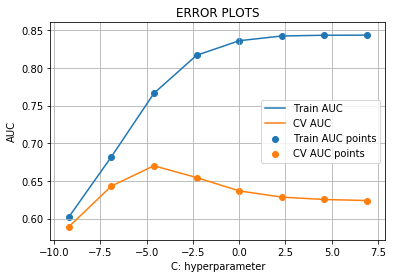

In [101]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
import math
C=[10**x for x in range(-4,4)]

for i in tqdm(C):
    lr= LogisticRegression(C=i)
    l=lr.fit(S_BOW_train, y_train)
    y_train_pred = batch_predict(lr,S_BOW_train)
    y_cv_pred = batch_predict(lr, S_BOW_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot([math.log(i) for i in C],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in C],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in C],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in C],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

using Gridsearch CV for finding best hyperparameter

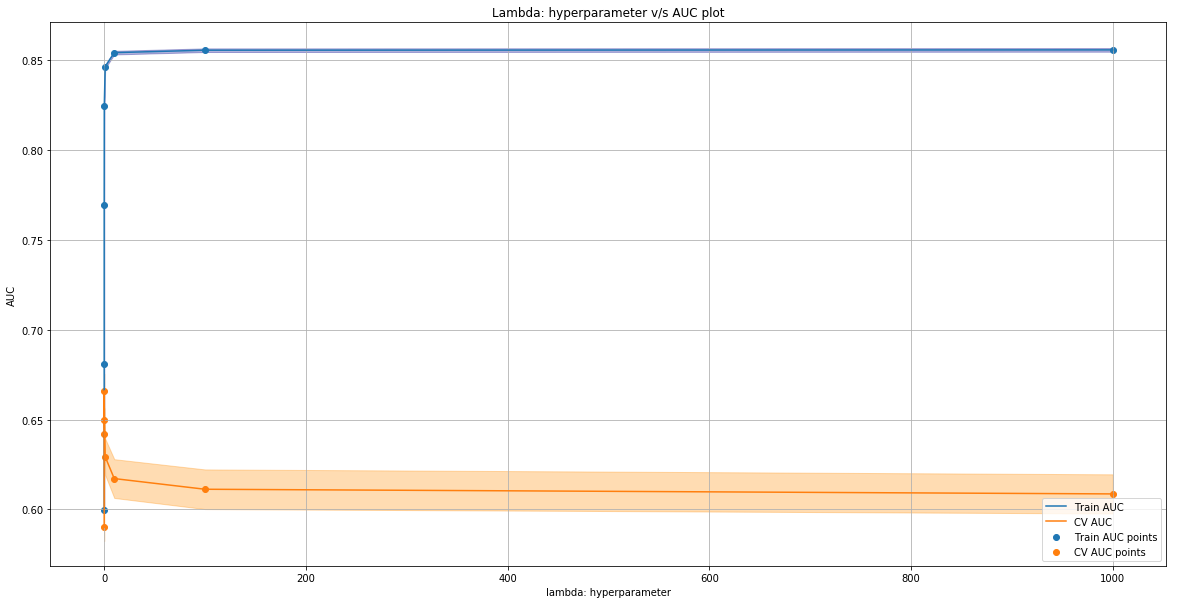

In [93]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
C_vals=[10**x for x in range(-4,4)]
parameters = {'C':C_vals}
clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')
clf.fit(S_BOW_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

we can take C=0.01

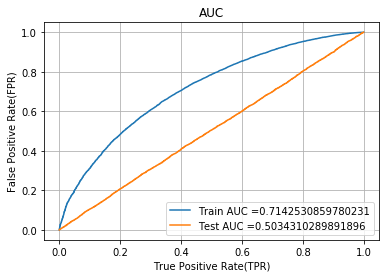

In [111]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.01,random_state=0, class_weight='balanced')
model.fit(S_BOW_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, S_BOW_train)
y_test_pred = batch_predict(model, S_BOW_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [78]:
def prediction(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.4302584083448771 for threshold 0.844


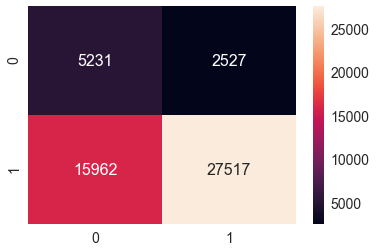

In [114]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [1]:
C_vals=[10**x for x in range(-4,4)]
print(C_vals)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


Confuision matrix for test data

the maximum value of tpr*(1-fpr) 0.4302584083448771 for threshold 0.844


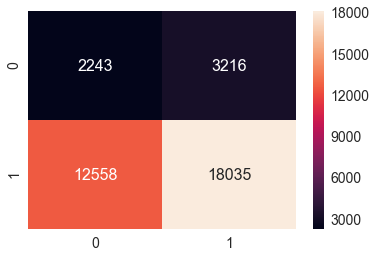

In [115]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# Feature set 2 USING TFIDF_Train

In [103]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_TFIDF_train= hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,clean_project_grade_category_one_hot_train,text_tfidf_train,title_tfidf_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
S_TFIDF_train.shape

(51237, 6843)

In [104]:
S_TFIDF_test= hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,clean_project_grade_category_one_hot_test,text_tfidf_test,title_tfidf_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
S_TFIDF_test.shape

(36052, 6843)

In [105]:
S_TFIDF_cv= hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,clean_project_grade_category_one_hot_cv,text_tfidf_cv,title_tfidf_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
S_TFIDF_cv.shape

(21959, 6843)

Finding best parameter using CV

100%|██████████| 8/8 [01:08<00:00, 14.20s/it]


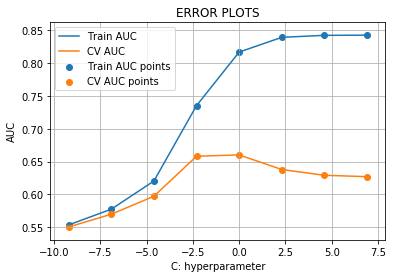

In [106]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
C=[10**x for x in range(-4,4)]
for i in tqdm(C):
    lr= LogisticRegression(C=i)
    l=lr.fit(S_TFIDF_train, y_train)
    y_train_pred = batch_predict(lr,S_TFIDF_train)
    y_cv_pred = batch_predict(lr,S_TFIDF_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)
plt.plot([math.log(i) for i in C],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in C],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in C],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in C],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Finding best hyperparameter using GridSearchCV

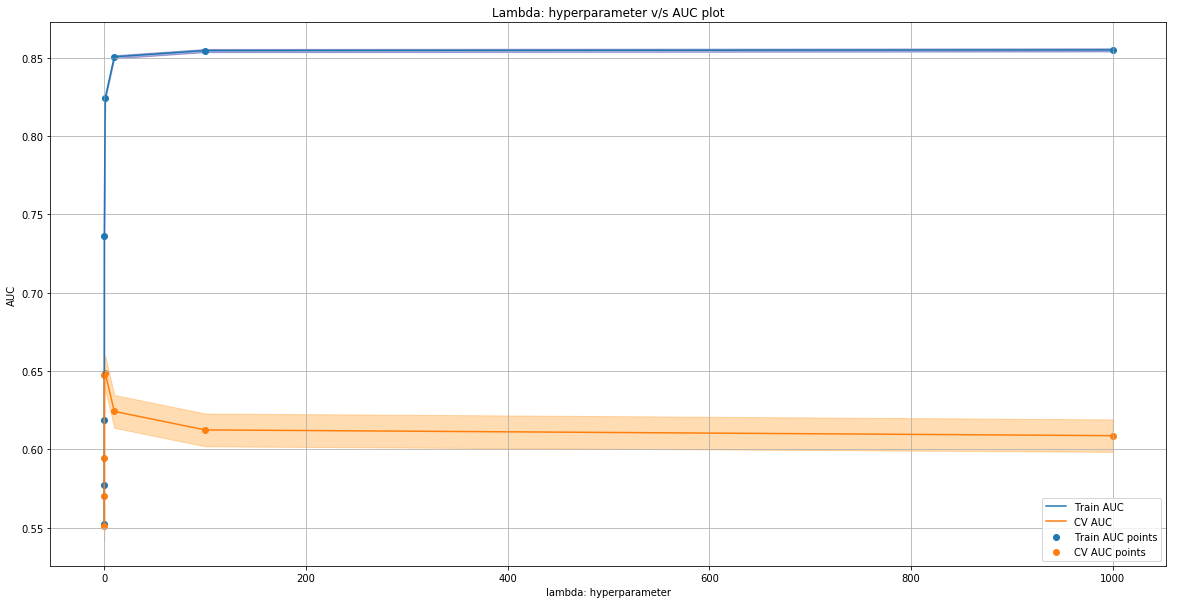

In [108]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
C_vals=[10**x for x in range(-4,4)]
parameters = {'C':C_vals}
clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')
clf.fit(S_TFIDF_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

so we can take C=0.01

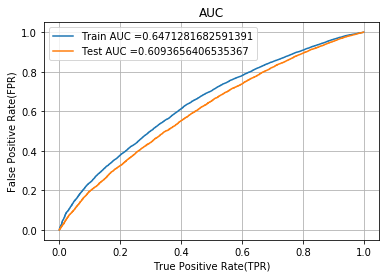

In [109]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.01,random_state=0, class_weight='balanced')
model.fit(S_TFIDF_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, S_TFIDF_train)
y_test_pred = batch_predict(model, S_TFIDF_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.36934132315677426 for threshold 0.506


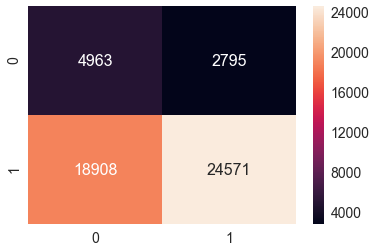

In [112]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.36934132315677426 for threshold 0.506


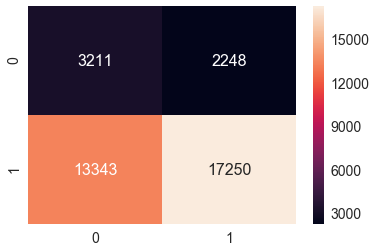

In [113]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# Feature set 3 USING AVG_W2V


In [114]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_avgw2v_train= hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,clean_project_grade_category_one_hot_train,avg_w2v_vectors_train,avg_w2v_title_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(S_avgw2v_train.shape)

S_avgw2v_test= hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,clean_project_grade_category_one_hot_test,avg_w2v_vectors_test,avg_w2v_title_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(S_avgw2v_test.shape)

S_avgw2v_cv= hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,clean_project_grade_category_one_hot_cv,avg_w2v_vectors_cv,avg_w2v_title_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
print(S_avgw2v_cv.shape)


(51237, 708)
(36052, 708)
(21959, 708)


FINDING BEST HYPERPARAMETER USING CV

100%|██████████| 8/8 [04:58<00:00, 49.10s/it]


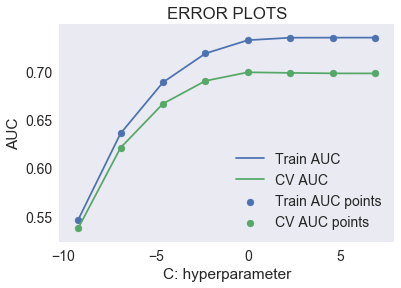

In [115]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
C=[10**x for x in range(-4,4)]

for i in tqdm(C):
    lr= LogisticRegression(C=i)
    l=lr.fit(S_avgw2v_train, y_train)
    y_train_pred = batch_predict(lr,S_avgw2v_train)
    y_cv_pred = batch_predict(lr, S_avgw2v_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)
plt.plot([math.log(i) for i in C],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in C],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in C],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in C],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

FINDING BEST HYPERPARAMETER USING GRIDSEARCHCV

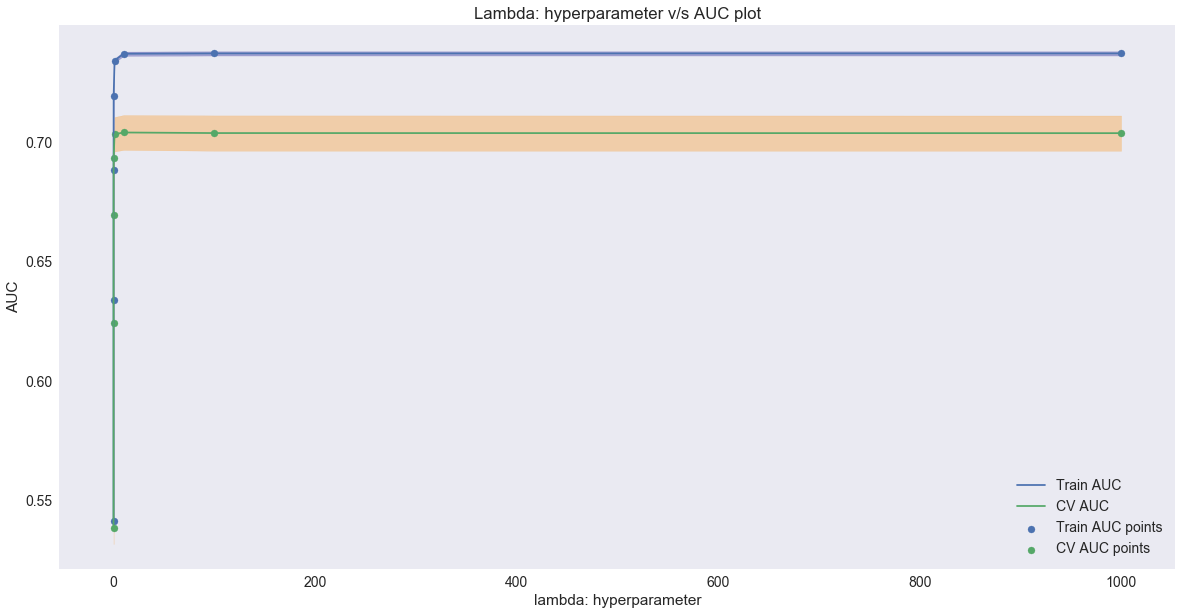

In [116]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
C_vals=[10**x for x in range(-4,4)]
parameters = {'C':C_vals}
clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')
clf.fit(S_avgw2v_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

lets take C=0.05

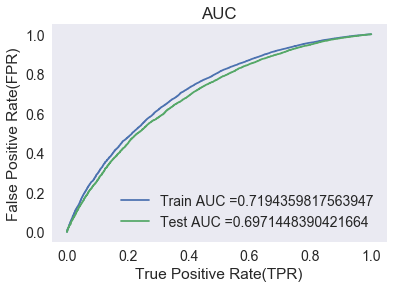

In [117]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.05,random_state=0, class_weight='balanced')
model.fit(S_avgw2v_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, S_avgw2v_train)
y_test_pred = batch_predict(model, S_avgw2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

CONFUSION MATRIX FOR TRAIN DATA

the maximum value of tpr*(1-fpr) 0.440502587764335 for threshold 0.504


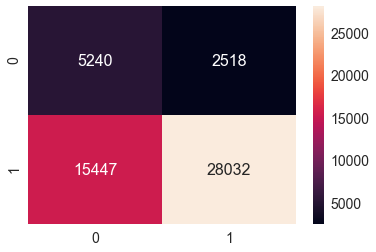

In [118]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

CONFUSION MATRIX FOR TEST DATA

the maximum value of tpr*(1-fpr) 0.440502587764335 for threshold 0.504


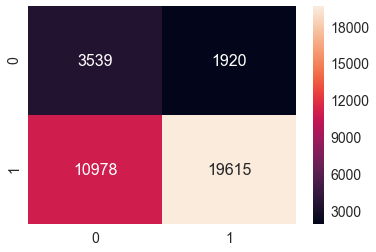

In [119]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# FEATURE SET 4:TFIDF_W2V

In [75]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_tfidf_w2v_train= hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,clean_project_grade_category_one_hot_train,tfidf_w2v_vectors_train,tfidf_w2v_ppt_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(S_tfidf_w2v_train.shape)

S_tfidf_w2v_test= hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,clean_project_grade_category_one_hot_test,tfidf_w2v_vectors_test,tfidf_w2v_ppt_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(S_tfidf_w2v_test.shape)

S_tfidf_w2v_cv= hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,clean_project_grade_category_one_hot_cv,tfidf_w2v_vectors_cv,tfidf_w2v_ppt_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
print(S_tfidf_w2v_cv.shape)



(51237, 708)
(36052, 708)
(21959, 708)


Using CV to find best hyperparameter


100%|██████████| 8/8 [03:19<00:00, 34.98s/it]

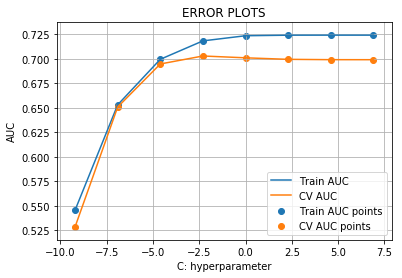

In [80]:
import math
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
C=[10**x for x in range(-4,4)]
for i in tqdm(C):
    lr= LogisticRegression(C=i)
    l=lr.fit(S_tfidf_w2v_train, y_train)
    y_train_pred = batch_predict(lr,S_tfidf_w2v_train)
    y_cv_pred = batch_predict(lr, S_tfidf_w2v_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)
plt.plot([math.log(i) for i in C],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in C],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in C],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in C],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Using GridsearchCV to find best hyperparameter

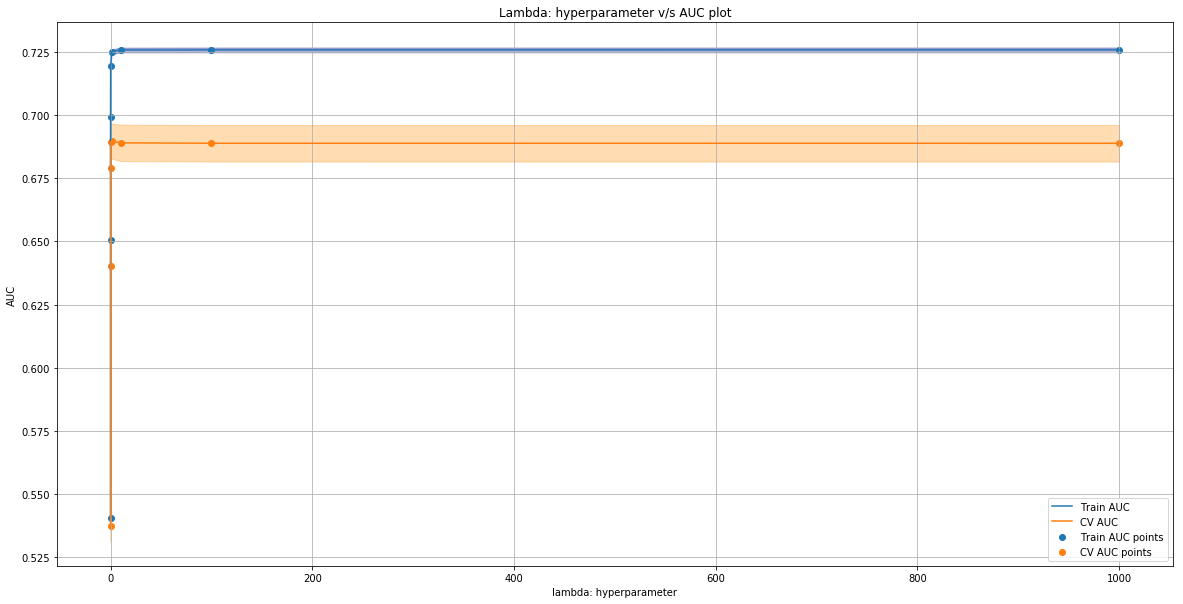

In [81]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
C_vals=[10**x for x in range(-4,4)]
parameters = {'C':C_vals}
clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')
clf.fit(S_tfidf_w2v_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

lets take c=0.05 from graph

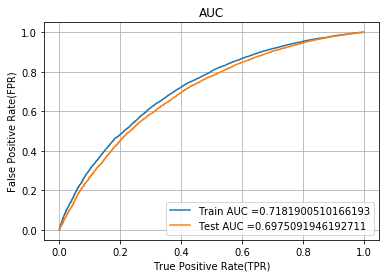

In [84]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.05,random_state=0, class_weight='balanced')
model.fit(S_tfidf_w2v_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, S_tfidf_w2v_train)
y_test_pred = batch_predict(model, S_tfidf_w2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.43763066352698 for threshold 0.494


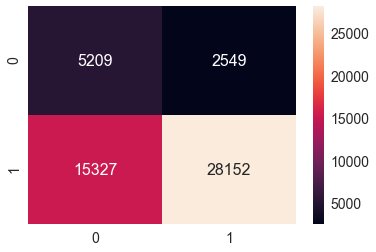

In [85]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix on test data

the maximum value of tpr*(1-fpr) 0.43763066352698 for threshold 0.494


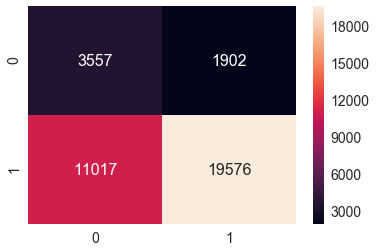

In [86]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

Generating new set of features without text

In [87]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
without_text_train= hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,clean_project_grade_category_one_hot_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(without_text_train.shape)

without_text_test= hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,clean_project_grade_category_one_hot_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(without_text_test.shape)

without_text_cv= hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv,clean_project_grade_category_one_hot_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
print(without_text_cv.shape)

(51237, 108)
(36052, 108)
(21959, 108)


Finding best hyperparameter using CV


100%|██████████| 8/8 [00:11<00:00,  1.79s/it]

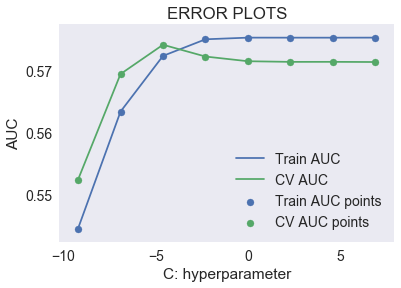

In [88]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
C=[10**x for x in range(-4,4)]
for i in tqdm(C):
    lr= LogisticRegression(C=i)
    l=lr.fit(without_text_train, y_train)
    y_train_pred = batch_predict(lr,without_text_train)
    y_cv_pred = batch_predict(lr, without_text_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)
plt.plot([math.log(i) for i in C],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in C],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in C],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in C],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Finding best hyperparameter using GridSearchCV

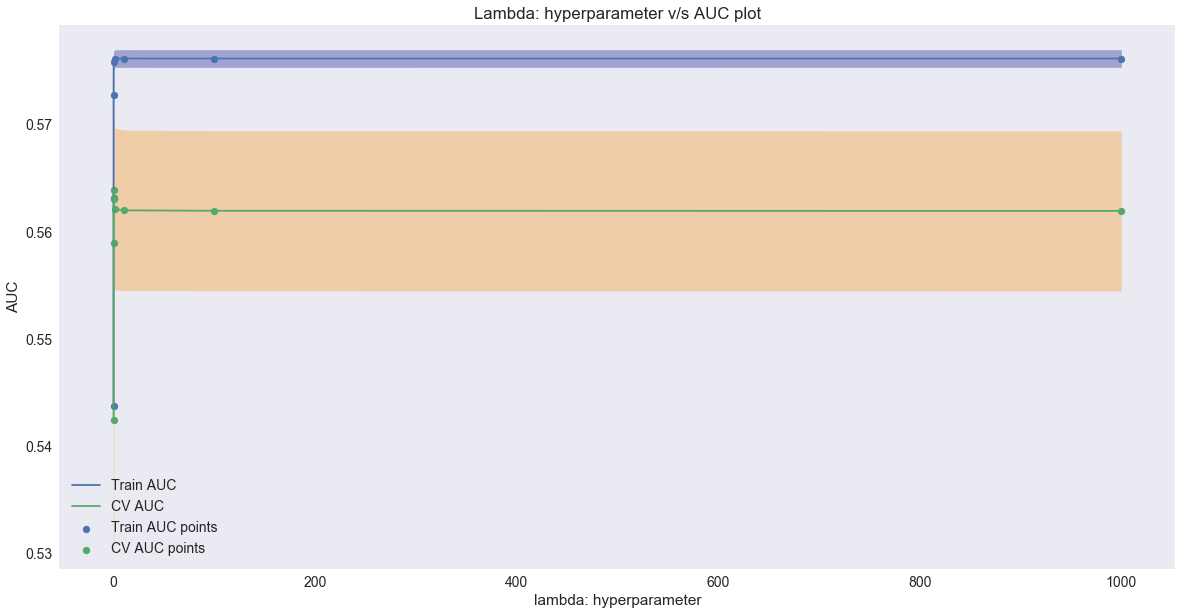

In [89]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
C_vals=[10**x for x in range(-4,4)]
parameters = {'C':C_vals}
clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')
clf.fit(without_text_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

lets take C=0.01 from graph

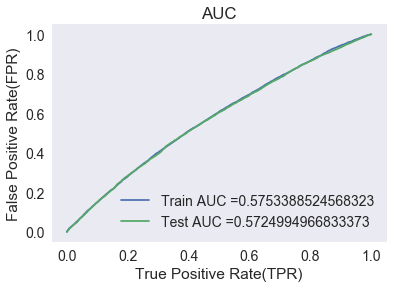

In [90]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.05,random_state=0, class_weight='balanced')
model.fit(without_text_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, without_text_train)
y_test_pred = batch_predict(model, without_text_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Confusion matix for train data:

the maximum value of tpr*(1-fpr) 0.30788436380030887 for threshold 0.503


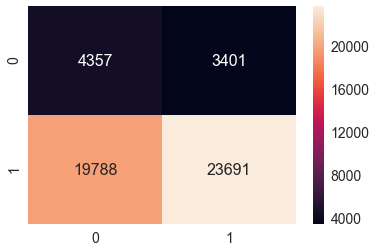

In [91]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix for test data:

the maximum value of tpr*(1-fpr) 0.30788436380030887 for threshold 0.503


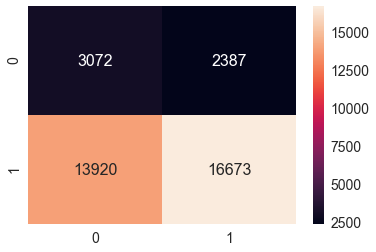

In [92]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [93]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]
x.add_row(["BOW", "Logistic Regression", 0.01, 0.501])
x.add_row(["TFIDF", "Logistic Regression", 0.01, 0.501])
x.add_row(["AVG W2V", "Logistic Regression", 0.05, 0.501])
x.add_row(["TFIDF W2V", "Logistic Regression", 0.05, 0.502])
x.add_row(["WITHOUT TEXT", "Logistic Regression", 0.01, 0.502])
print(x)

+--------------+---------------------+-----------------------+-------+
|  Vectorizer  |        Model        | Alpha:Hyper Parameter |  AUC  |
+--------------+---------------------+-----------------------+-------+
|     BOW      | Logistic Regression |          0.01         | 0.501 |
|    TFIDF     | Logistic Regression |          0.01         | 0.501 |
|   AVG W2V    | Logistic Regression |          0.05         | 0.501 |
|  TFIDF W2V   | Logistic Regression |          0.05         | 0.502 |
| WITHOUT TEXT | Logistic Regression |          0.01         | 0.502 |
+--------------+---------------------+-----------------------+-------+


Conclusion:
1.The text data didnt make any significant difference in AUC value hence we can say it is not a very useful feature.
2.The computation time taken or time complexity is very less as compared to KNN.